In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

Elimizde geniş kapsamlı bir veri seti bulunmaktadır. Bu veri setinden işlemimize göre kullanacağımız sütunları **usecols** syntaxı ile çekerek işlemimize başlayacağım.

In [78]:
df = pd.read_csv("C:\\Users\\rbesli\\Desktop\\CASE_1\\used_cars_data.csv", usecols=[
    "price", #fiyat dağılımı ve  korelasyonlarda için kullanacağız
    "year",     #fiyat-yıl korelasyonu için kullanılacak
    "mileage",  #fiyat-km korelasyonu için -> KM BİLGİSİYMİŞ
    "listed_date",  #tarihten yıl bilgisi çıkarmak için
],
parse_dates=["listed_date"] #string olan tarihi, direkt tarih formatına çevirdik
)

In [82]:
df['year'] = df['listed_date'].dt.year  #listed_date sütunundan yıl bilgisinş çıkardık

In [83]:
df.head()

,listed_date,mileage,price,year
0,2019-04-06,7.0,23141.0,2019
1,2020-02-15,8.0,46500.0,2020
3,2020-02-26,11.0,67430.0,2020
4,2020-04-25,7.0,48880.0,2020
5,2020-01-11,12.0,66903.0,2020


In [ ]:
df_clean = df.dropna() #eksik verileri temizledik
df = df_clean
df.head()

,listed_date,mileage,price,year
0,2019-04-06,7.0,23141.0,2019
1,2020-02-15,8.0,46500.0,2020
3,2020-02-26,11.0,67430.0,2020
4,2020-04-25,7.0,48880.0,2020
5,2020-01-11,12.0,66903.0,2020


Veri Setimizi Hazırladık. İlk aşama olarak Python&İstatistik başlığında verilen görevlendirmeyi gerçekleştireceğim.

**FİYAT DAĞILIMI**

In [85]:
ortalama_fiyat = df['price'].mean()
medyan_fiyat = df['price'].median()
min_fiyat = df['price'].min()
max_fiyat = df['price'].max()

print("Fiyat Dağılımı Bilgileri:")
print(f"Ortalama Fiyat : {ortalama_fiyat:} USD")
print(f"Medyan Fiyat   : {medyan_fiyat:} USD")
print(f"Minimum Fiyat  : {min_fiyat:} USD")
print(f"Maksimum Fiyat : {max_fiyat:} USD")


Fiyat Dağılımı Bilgileri:
Ortalama Fiyat : 29620.136089369753 USD
Medyan Fiyat   : 26111.0 USD
Minimum Fiyat  : 165.0 USD
Maksimum Fiyat : 3299995.0 USD


**VARYANS**

In [86]:
print(f"Fiyat varyansı: {df['price'].var():.2f}")       #Hazır fonksiyon ile varyansını hesapladım

Fiyat varyansı: 382038770.59


In [87]:
print(f"Fiyat standart sapması: {df['price'].std():.2f}")   #Ek olarak standart sapmayı da hazır fonksiyon ile hesaplamak istedim

Fiyat standart sapması: 19545.81


**KORELASYON**

In [90]:
# 1. Fiyat - Yıl Korelasyonu (Pearson Yöntemi ile uyguladım)
corr_price_year, p_value_year = stats.pearsonr(df["price"], df["year"]) #Hazır kütüphane ile uygulandı
print("FİYAT - YIL KORELASYONU (Pearson):")
print(f"Korelasyon katsayısı: {corr_price_year:.4f}")
print(f"P-değeri: {p_value_year:.4e}")

FİYAT - YIL KORELASYONU (Pearson):
Korelasyon katsayısı: -0.0536
P-değeri: 0.0000e+00


In [91]:
pearson_corr_fiyat_yil = df["year"].corr(df["price"], method="pearson")
print(pearson_corr_fiyat_yil)

-0.05363385881628849


In [92]:
# 2. Fiyat - KM Korelasyonu (Pearson)
corr_price_km, p_value_km = stats.pearsonr(df["price"], df["mileage"])
print("FİYAT - KM KORELASYONU (Pearson):")
print(f"Korelasyon katsayısı: {corr_price_km:.4f}")
print(f"P-değeri: {p_value_km:.4e}")

FİYAT - KM KORELASYONU (Pearson):
Korelasyon katsayısı: -0.2741
P-değeri: 0.0000e+00


In [93]:
pearson_corr_fiyat_km = df["mileage"].corr(df["price"], method="pearson")
print(pearson_corr_fiyat_km)

-0.2740815970985039


**GÖRSELLEŞTİRME**

İstenen görevlendirme şu şekildedir :
- SCATTERPLOT ile KM - FİYAT ilişkisi


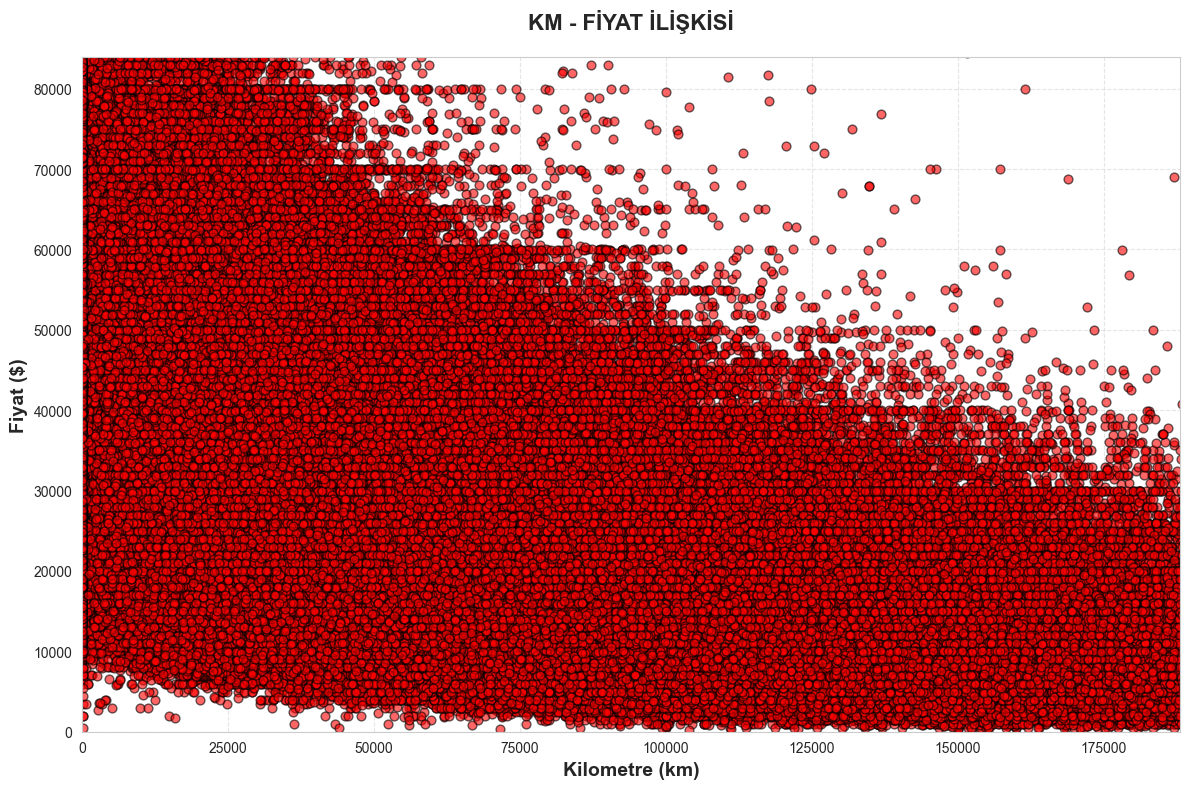

In [119]:

plt.figure(figsize=(12, 8)) #temel görsel ayarımızı gerçekleştirdik

plt.scatter(
    x=df['mileage'],    #X eksenimiz kilometre bilgisi olacak
    y=df['price'],      #Y eksenimiz fiyatbilgisi olacak
    alpha=0.6,          # Şeffaflık (%60)
    s=40,               # Nokta büyüklüğü
    color='red',  #Kırmızı olarak belirledim
    edgecolors='black', #Noktaları anlayabilmek için siyah olacak şekilde kenar rengi ayarladım
    linewidth=1       #Siyah olan kenar çizgi kalınlığını belirlemek istedim
)

plt.title('KM - FİYAT İLİŞKİSİ', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Kilometre (km)', fontsize=14, fontweight='bold')
plt.ylabel('Fiyat ($)', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.5, linestyle='--')

plt.xlim(0, df['mileage'].quantile(0.99))  # %99'a kadar göstererek aşırı uç değerleri kaldırıyoruz bu sayede eksenlerimde dengeli görsel çıktı üretiliyor
plt.ylim(0, df['price'].quantile(0.99))   

plt.savefig('km_fiyat_scatterplot.png', dpi=300, bbox_inches='tight')   #Sunuma eklemek için görselimi dosya olarak kaydettim

plt.tight_layout()  #önceki denemelerimde görselimde kayma meydana geldi. Bu fonksiyon ile etkilerler arası düzen otomatik sağlanıyor.
plt.show()

- HEATMAP ile özellik korelasyonları


Korelasyon Matrisi:
            price      year   mileage      year
price    1.000000 -0.053634 -0.274082 -0.053634
year    -0.053634  1.000000  0.022596  1.000000
mileage -0.274082  0.022596  1.000000  0.022596
year    -0.053634  1.000000  0.022596  1.000000


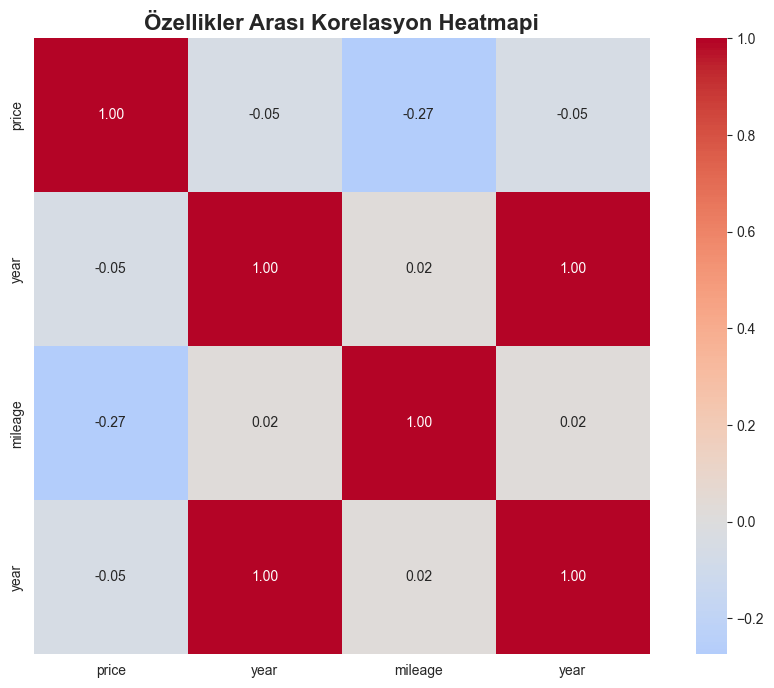

In [111]:
numeric_columns = ['price', 'year', 'mileage', 'year']
correlation_matrix = df[numeric_columns].corr() #hazır fonksiyon ile en başta belirttiğim 4 sütunun korelasyon matrislerini oluşturdum

print("Korelasyon Matrisi:")
print(correlation_matrix)

plt.figure(figsize=(12, 8))
#heatmap kısmı
sns.heatmap(correlation_matrix, 
            annot=True,        #Hücrelere korelasyon değerlerini yazmamızı sağlıyormuş
            cmap='coolwarm',   #Renk paleti :) kız neşesi bu kısımlar
            center=0,          # Merkez değeri (0 için nötr renk)
            square=True,       #Kare hücreler belirtildi burada . Bu satır olmasa da olur ama genel görsel boyutu çok büyük oluyor
            fmt='.2f',         #Sayı formatında ondalık basamakta 2 sayının olmasını sağladım
            )

plt.title('Özellikler Arası Korelasyon Heatmapi', fontsize=16, fontweight='bold')

plt.savefig('ozellikler_korelasyon_heatmap.png', dpi=300, bbox_inches='tight') #sunumum için png olarak kaydediyorum klasörüme

plt.show()

- HİSTOGRAM ile Fiyat Dağılımı

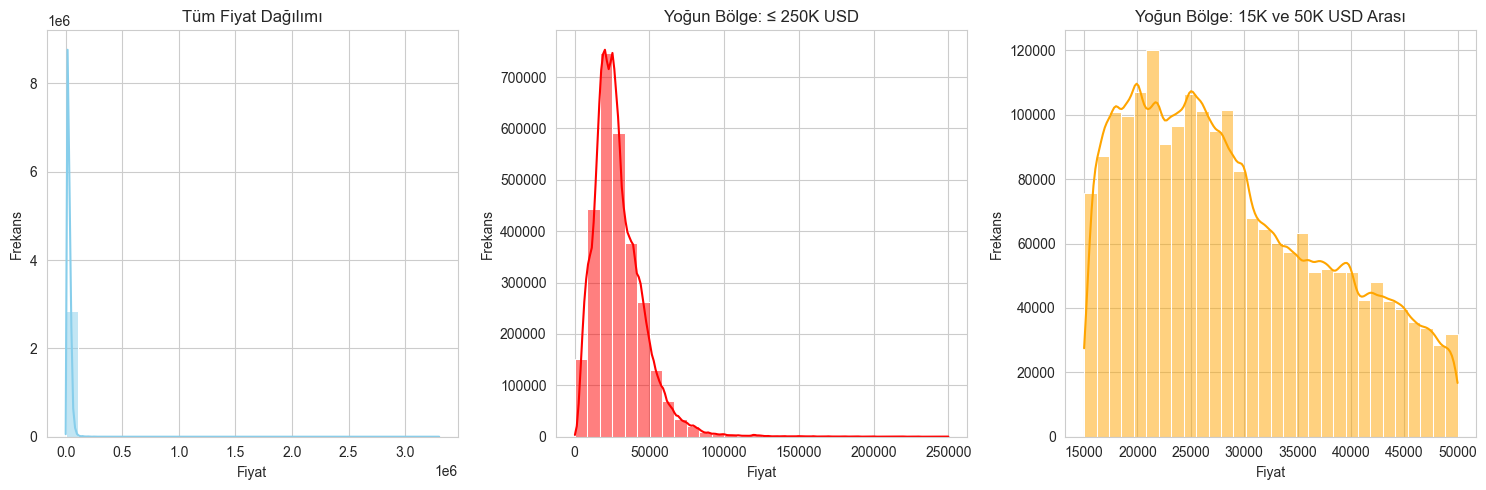

In [117]:
sns.set_style("whitegrid")  #Grafiklerimin anlaşılabilir olmazı için beyaz ızgara arka planı ayarlandı
plt.rcParams['figure.figsize'] = (15, 5)  #Grafik boyutunu belirledim

# 1. grafiğim tüm fiyat dağılımını gösterecek en uç değerlerim de bu grafikte olacak
plt.subplot(1, 3, 1)  #1 satırda, 3 sütun arasında, 1. grafik olacak şekilde ayarlandı ilk grafiğim
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title('Tüm Fiyat Dağılımı')  
plt.xlabel('Fiyat')              
plt.ylabel('Frekans')            

# 2. grafiğim ile yoğun bölgeye yakınlaşıyorum (0 - 250.000 USD arası)
plt.subplot(1, 3, 2)  
yogun_bolge1 = df[df['price'] <= 250_000]  #Fiyatı 250k'dan küçük olanlar
sns.histplot(yogun_bolge1['price'], kde=True, bins=30, color='red')
plt.title('Yoğun Bölge: ≤ 250K USD')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')

# 3. grafiğim en yoğun bölgeyi gösterecek (15.000 - 50.000 USD arası)
plt.subplot(1, 3, 3)  
yogun_bolge2 = df[(df['price'] >= 15_000) & (df['price'] <= 50_000)]  
sns.histplot(yogun_bolge2['price'], kde=True, bins=30, color='orange')
plt.title('Yoğun Bölge: 15K ve 50K USD Arası')
plt.xlabel('Fiyat')
plt.ylabel('Frekans')


plt.savefig('fiyat_dagilimi_histogram.png', dpi=300, bbox_inches='tight') #sunumum için png olarak kaydediyorum klasörüme


plt.tight_layout() #Alt alta kaymaları önlemek için kullanılıyor
plt.show()
